In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_ds,train_labels),(test_ds,test_labels)=tfds.load('tf_flowers',
                                                        split=['train[:70%]','train[:30%]'],
                                                        batch_size=-1,
                                                        as_supervised=True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to ~/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [3]:
train_ds[0].shape

TensorShape([442, 1024, 3])

In [4]:
train_ds = tf.image.resize(train_ds,(224,224))
test_ds = tf.image.resize(test_ds,(224,224))

In [5]:
train_labels

<tf.Tensor: shape=(2569,), dtype=int64, numpy=array([2, 3, 3, ..., 0, 2, 0])>

In [6]:
train_labels = to_categorical(train_labels,num_classes=5)
test_labels = to_categorical(test_labels,num_classes=5)

In [7]:
train_labels[0]

array([0., 0., 1., 0., 0.], dtype=float32)

In [8]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input


In [9]:
input_shape=train_ds[0].shape
input_shape

TensorShape([224, 224, 3])

In [10]:
base_model = ResNet50(weights='imagenet',include_top=False,input_shape=input_shape)

94765736/94765736 [==============================] - 0s 0us/step


In [11]:
base_model.trainable=False

In [12]:
train_ds=preprocess_input(train_ds)
test_ds=preprocess_input(test_ds)

In [13]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [14]:
from tensorflow.keras import layers,models

flatten_layer = layers.Flatten()
dense_1 = layers.Dense(50,activation='relu')
dense_2 = layers.Dense(20,activation='relu')
prediction_layer = layers.Dense(5,activation='softmax')

model = models.Sequential([
    base_model,
    flatten_layer,
    dense_1,
    dense_2,
    prediction_layer
])

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
es = EarlyStopping(patience=3,monitor='accuracy')

In [17]:
model.fit(train_ds,train_labels,epochs=10,callbacks=[es],validation_data=(test_ds,test_labels))

Epoch 1/10
81/81 [==============================] - 521s 6s/step - loss: 2.5865 - accuracy: 0.6267 - val_loss: 0.8352 - val_accuracy: 0.7884
Epoch 2/10
81/81 [==============================] - 515s 6s/step - loss: 0.5859 - accuracy: 0.8392 - val_loss: 0.2796 - val_accuracy: 0.9173
Epoch 3/10
81/81 [==============================] - 515s 6s/step - loss: 0.2336 - accuracy: 0.9221 - val_loss: 0.1290 - val_accuracy: 0.9628
Epoch 4/10
81/81 [==============================] - 514s 6s/step - loss: 0.1929 - accuracy: 0.9408 - val_loss: 0.1627 - val_accuracy: 0.9491
Epoch 5/10
81/81 [==============================] - 511s 6s/step - loss: 0.1079 - accuracy: 0.9634 - val_loss: 0.0344 - val_accuracy: 0.9909
Epoch 6/10
81/81 [==============================] - 511s 6s/step - loss: 0.0391 - accuracy: 0.9883 - val_loss: 0.0254 - val_accuracy: 0.9946
Epoch 7/10
81/81 [==============================] - 511s 6s/step - loss: 0.0211 - accuracy: 0.9961 - val_loss: 0.0083 - val_accuracy: 0.9991
Epoch 8/10
81

In [18]:
metrics = pd.DataFrame(model.history.history)

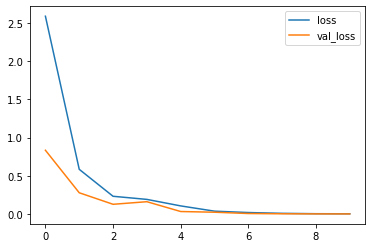

In [19]:
metrics[['loss','val_loss']].plot()

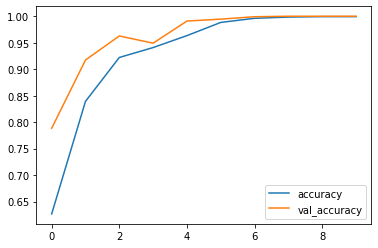

In [20]:
metrics[['accuracy','val_accuracy']].plot()